# Import Libraries

In [1]:
import warnings
import pickle
warnings.filterwarnings(action='ignore')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
#load data
#df2=pd.read_csv("../input/flureports/FluNetInteractiveReport.csv")
#df2.head(1)
data=pd.read_csv("~/DSI-Work/DSI Capstone Project/Flu/WPOFluNetInteractiveReport.csv", parse_dates=['EDATE'], index_col='EDATE', skiprows=3)
data.tail(1)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
EDATE,,,,,,,,,,,,,,,,,,,,,
2022-03-27,Viet Nam,Western Pacific Region of WHO,South-East Asia,2022,12,2022-03-21,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Sporadic


# EDA and Data Pre-processing

In [6]:
nan_values= data.isna()
nan_columns = nan_values.any()
#columns_with_nan = df.columns[nan_columns].tolist()
print(nan_columns)

Country              False
WHOREGION            False
FLUREGION            False
Year                 False
Week                 False
SDATE                False
SPEC_RECEIVED_NB      True
SPEC_PROCESSED_NB     True
AH1                   True
AH1N12009             True
AH3                   True
AH5                   True
ANOTSUBTYPED          True
INF_A                 True
BYAMAGATA             True
BVICTORIA             True
BNOTDETERMINED        True
INF_B                 True
ALL_INF               True
ALL_INF2              True
TITLE                False
dtype: bool


In [ ]:
data.dtypes

In [3]:
data = data.fillna(0) #fill any remaining gaps with 0
_=data.pop('SPEC_RECEIVED_NB') #remove the number of specimen received
_=data.pop('SPEC_PROCESSED_NB') #remove the number of specimen processed
data['SDATE'] = pd.to_datetime(data['SDATE']) #from object to datetime
data.head()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
EDATE,,,,,,,,,,,,,,,,,,,
2000-01-09,Australia,Western Pacific Region of WHO,Oceania Melanesia Polynesia,2000,1,2000-01-03,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sporadic
2000-01-16,Australia,Western Pacific Region of WHO,Oceania Melanesia Polynesia,2000,2,2000-01-10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sporadic
2000-01-23,Australia,Western Pacific Region of WHO,Oceania Melanesia Polynesia,2000,3,2000-01-17,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,Sporadic
2000-01-30,Australia,Western Pacific Region of WHO,Oceania Melanesia Polynesia,2000,4,2000-01-24,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,No Activity
2000-02-06,Australia,Western Pacific Region of WHO,Oceania Melanesia Polynesia,2000,5,2000-01-31,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Sporadic


### Plotting time-series

[Text(0.5, 1.0, 'Raw Data'), Text(0.5, 0, 'date'), Text(0, 0.5, '')]

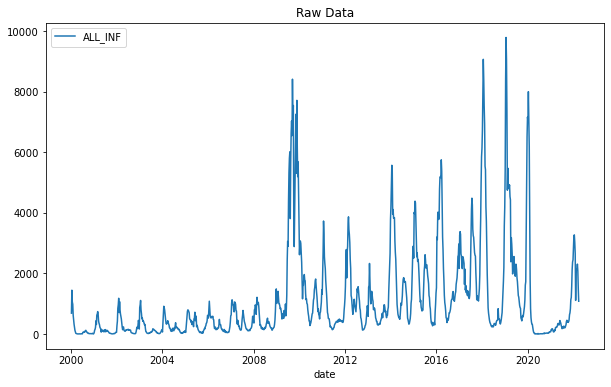

In [4]:
#plot the total column for all influenza cases
fig, ax = plt.subplots(figsize=(10,6))
df=data.groupby('EDATE').sum()
sns.lineplot(x='EDATE', y='ALL_INF', label='ALL_INF', data=df, ax=ax)
ax.legend(loc='upper left')
ax.set(title='WHO Flunet Reported Influenza Cases', xlabel='date', ylabel='')

[Text(0.5, 1.0, 'WHO Flunet Influenza A and B confirmed cases 2000-2021'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, '')]

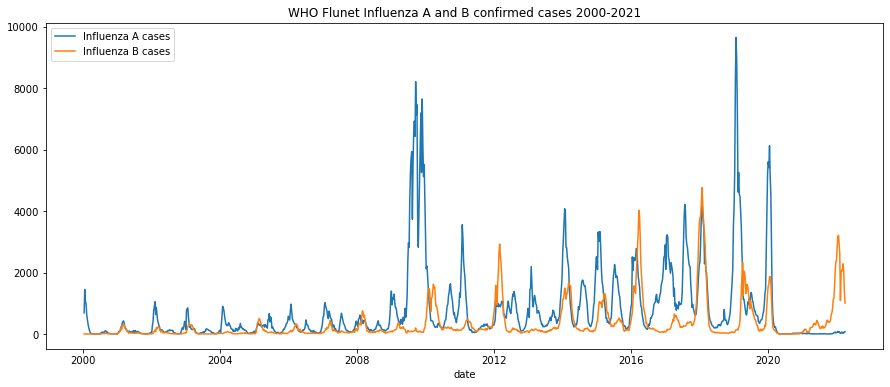

In [13]:
#Compare plots of Influenza A over B
fig, ax = plt.subplots(figsize=(15,6))
df=data.groupby('EDATE').sum()
sns.lineplot(x='EDATE', y='INF_A', label='Influenza A cases', data=df, ax=ax)
sns.lineplot(x='EDATE', y='INF_B', label='Influenza B cases', data=df, ax=ax)

ax.legend(loc='upper left')
ax.set(title='WHO Flunet Influenza A and B confirmed cases 2000-2021', xlabel='date', ylabel='')

[Text(0.5, 1.0, 'WHO Flunet Influenza A confirmed cases by subtype 2000-2021'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, '')]

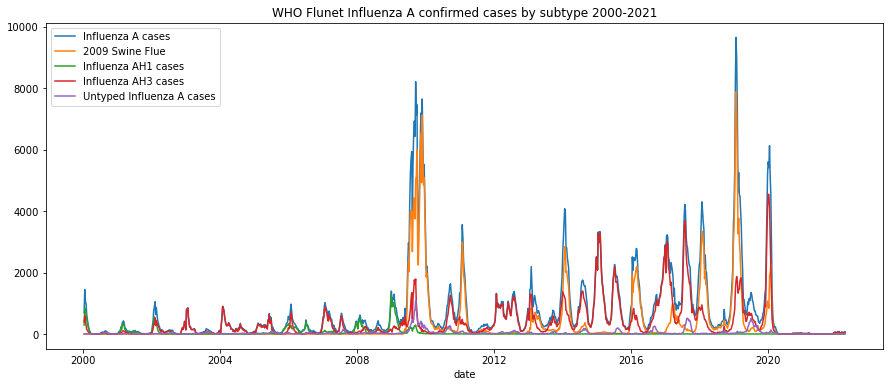

In [14]:
#plot the raw data
fig, ax = plt.subplots(figsize=(15,6))
df=data.groupby('EDATE').sum()
sns.lineplot(x='EDATE', y='INF_A', label='Influenza A cases', data=df, ax=ax)
sns.lineplot(x='EDATE', y='AH1N12009', label='2009 Swine Flue', data=df, ax=ax)
sns.lineplot(x='EDATE', y='AH1', label='Influenza AH1 cases', data=df, ax=ax)
sns.lineplot(x='EDATE', y='AH3', label='Influenza AH3 cases', data=df, ax=ax)
sns.lineplot(x='EDATE', y='ANOTSUBTYPED', label='Untyped Influenza A cases', data=df, ax=ax)

ax.legend(loc='upper left')
ax.set(title='WHO Flunet Influenza A confirmed cases by subtype 2000-2021', xlabel='date', ylabel='')

In [ ]:
# data = data.fillna(0)
# nan_values= data.isna()
# nan_columns = nan_values.any()
# #columns_with_nan = df.columns[nan_columns].tolist()
# print(nan_columns)

In [4]:
target=data.pop('TITLE')
one_hot_encoded_data = pd.get_dummies(data)
one_hot_encoded_data.tail()

,Year,Week,SDATE,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,...,Country_New Zealand,Country_Papua New Guinea,Country_Philippines,Country_Republic of Korea,Country_Singapore,Country_Viet Nam,WHOREGION_Western Pacific Region of WHO,FLUREGION_Eastern Asia,FLUREGION_Oceania Melanesia Polynesia,FLUREGION_South-East Asia
EDATE,,,,,,,,,,,,,,,,,,,,,
2022-02-27,2022,8,2022-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2022-03-06,2022,9,2022-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2022-03-13,2022,10,2022-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2022-03-20,2022,11,2022-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2022-03-27,2022,12,2022-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1


In [11]:
one_hot_encoded_data.columns

Index(['Year', 'Week', 'SDATE', 'AH1', 'AH1N12009', 'AH3', 'AH5',
       'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED',
       'INF_B', 'ALL_INF', 'ALL_INF2', 'Country_Australia', 'Country_Cambodia',
       'Country_China', 'Country_Fiji', 'Country_Japan',
       'Country_Lao People's Democratic Republic', 'Country_Malaysia',
       'Country_Mongolia', 'Country_New Caledonia', 'Country_New Zealand',
       'Country_Papua New Guinea', 'Country_Philippines',
       'Country_Republic of Korea', 'Country_Singapore', 'Country_Viet Nam',
       'WHOREGION_Western Pacific Region of WHO', 'FLUREGION_Eastern Asia',
       'FLUREGION_Oceania Melanesia Polynesia', 'FLUREGION_South-East Asia'],
      dtype='object')

<AxesSubplot:title={'center':'Influenza trend'}, xlabel='EDATE'>

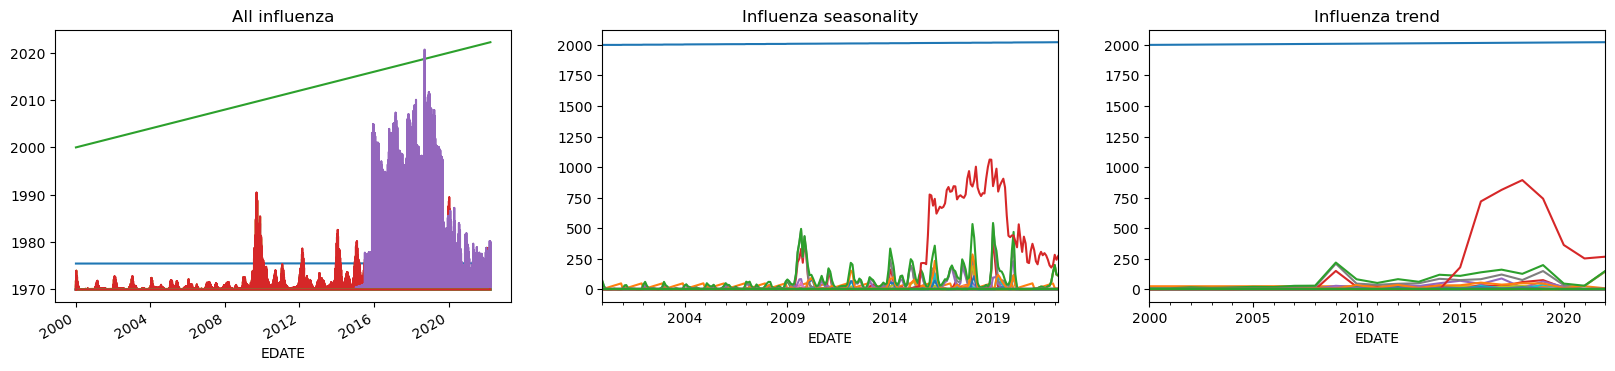

In [5]:
cat_data=one_hot_encoded_data
df_inf=cat_data.resample('1m').mean()
df2_inf=cat_data.resample('1y').mean()
#check for seasonality, trend, 
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
cat_data.plot(title='All influenza', legend=False, ax=axes[0])
df_inf.plot(title='Influenza seasonality', legend=False, ax=axes[1])
df2_inf.plot(title='Influenza trend', legend=False, ax=axes[2])
#data['AH5'].pl

In [ ]:
#Check if data is non-stationary using ADF
cols= cat_data.columns[3:]
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
for col in cols:
    dftest = adfuller(cat_data[col], autolag='AIC')
    #print(f'Results for the predictor values in {col}')
    #print("Test statistic = {:.3f}".format(dftest[0]))
    #print("P-value = {:.3f}".format(dftest[1]))
    #print("Critical values :")
    for k, v in dftest[4].items():
        if v<dftest[0]:
            print(f'The {col} data in not stationary with {100-int(k[:-1])}% confidence')
        #print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    #dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    #for key,value in dftest[4].items():
     #   dfoutput['critical value (%s)'%key]= value
    #print(dfoutput)


### Except for the one-hot encoded data, the rest of the relevant features are stationary

## Transfrom text target to numerical

## Time series prediction with prophet

In [ ]:
#!sudo pip install fbprophet

In [6]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [12]:
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet

# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#prophet_df = read_csv('../input/flureports/WPOFluNetInteractiveReport.csv', skiprows=3)
cat_data=one_hot_encoded_data
prophet_df=cat_data.reset_index()
prophet_df.rename(columns = {'EDATE':'ds', 'ALL_INF':'y'}, inplace = True)


# prepare expected column names
df= prophet_df[['ds', 'y']]

#df= [ds, y]
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

#split data
from sklearn.model_selection import train_test_split

x_train, x_test= train_test_split(df, test_size=0.3)
x_train.sort_values(by='ds', axis=0, ascending=True, inplace=True)
x_test.sort_values(by='ds', axis=0, ascending=True, inplace=True)
# define the model
model1 = Prophet()
# fit the model
model1.fit(x_train)
filename = 'prophet.sav'
pickle. dump(model1, open(filename, 'wb'))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.1904
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31236.1    0.00189074          1504      0.2223      0.2223      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       31240.8    0.00119307       137.099      0.8375      0.8375      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       31243.5   0.000138887       87.7633      0.8294      0.8294      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346         31244   1.87339e-05       166.978   8.156e-08       0.001      474  LS failed, Hessian reset 
     399       31244.7   0.000126704       120.249       0.811       0.811      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       31245.1       0.00105    

In [8]:
df.head()

,ds,y
0,2000-01-09,1.0
1,2000-01-16,1.0
2,2000-01-23,2.0
3,2000-01-30,1.0
4,2000-02-06,1.0


In [ ]:
future= model.make_future_dataframe(periods=14)
forecast=model.predict(future)

In [ ]:
fig1 =model.plot(forecast)

In [15]:
regs=['Year', 'Week', 'SDATE', 'AH1', 'AH1N12009', 'AH3', 'AH5',
       'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED',
       'INF_B', 'ALL_INF2']

In [22]:
prophet_df.head(1)

,ds,Year,Week,SDATE,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,...,Country_New Zealand,Country_Papua New Guinea,Country_Philippines,Country_Republic of Korea,Country_Singapore,Country_Viet Nam,WHOREGION_Western Pacific Region of WHO,FLUREGION_Eastern Asia,FLUREGION_Oceania Melanesia Polynesia,FLUREGION_South-East Asia
0,2000-01-09,2000,1,2000-01-03,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
#split data
from sklearn.model_selection import train_test_split

x_train, x_test= train_test_split(prophet_df, test_size=0.3)
x_train.sort_values(by='ds', axis=0, ascending=True, inplace=True)
x_test.sort_values(by='ds', axis=0, ascending=True, inplace=True)
#Additional Regressor
pro_regressor= Prophet()
for r in regs:
    pro_regressor.add_regressor(r)
#Fitting the data
pro_regressor.fit(x_train)
#serialise prophet regressor
filename = 'prophet.sav'
pickle. dump(pro_regressor, open(filename, 'wb'))

In [ ]:
future_data = pro_regressor.make_future_dataframe(periods=14)
#forecast the data for Test  data
forecast_data = pro_regressor.predict(x_test)
pro_regressor.plot(forecast_data)

In [ ]:
plt.scatter(x=x_test.Year, y=x_test.y, s=5)

In [ ]:
#compare 14day forecast with test data
x=x_test.iloc[-15:,:]
plt.scatter(x=x.ds, y=x.y, s=50)
forecast=forecast_data.iloc[-15:,:]
plt.scatter(x=forecast.ds, y=forecast.yhat, s=5)

In [46]:
len(models)

22

In [41]:
time_series=['AH1', 'AH1N12009', 'AH3', 'AH5',
       'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED',
       'INF_B', 'ALL_INF2']

In [47]:
#split data
from sklearn.model_selection import train_test_split

x_train, x_test= train_test_split(prophet_df, test_size=0.3)
x_train.sort_values(by='ds', axis=0, ascending=True, inplace=True)
x_test.sort_values(by='ds', axis=0, ascending=True, inplace=True)

for idx, r in enumerate(time_series):
    df=pd.concat([x_train[['ds', 'y']], x_train.iloc[idx]], axis=1)
    multi_regressor= Prophet()
    r=multi_regressor.fit(df)
    models.append(r)
    del(df)
    
    #Fitting the data
#multi_regressor.fit(x_train)
#serialise prophet regressor
filename = 'multi_prophet.sav'
pickle. dump(models, open(filename, 'wb'))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.3848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       31109.1   0.000854376       299.242           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         31116   0.000606057       237.455      0.9526      0.9526      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       31116.9   1.58512e-05        139.75   1.379e-07       0.001      353  LS failed, Hessian reset 
     299       31117.2   0.000154035       96.2971           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31117.9     0.0015267        106.49           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       31118.6   9.43059e-06    

In [43]:
!ls

'Capstone Flu Intelligence.ipynb'      multi_prophet.sav
 data				       README.md
 Epidemic+Intelligence+Framework.jpg   requirements.txt
 flu-spook-backend.py		      'wild guess.webp.crdownload'
 influenza-spook.ipynb


In [ ]:
import os
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from scipy import stats
import seaborn as sns

# Epidemic Classifier 
> Now that can predict future trends, we need to know if we are predicting an epidemic or not. We build a classification model for that

In [ ]:
cat_data.dtypes

### Transform categorical columns

In [ ]:
## Label encode the text
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()#one hot encode the categores from label encoder
# using the encoder to encode the categorical columns
Y= labelencoder.fit_transform(target)
Y
#y=y.reshape(-1, 1) 


In [ ]:
data2=cat_data
_=data2.pop('SDATE')
data2.head(1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data2.iloc[:,3:], Y, test_size=0.3)

In [ ]:
# Model Training

from sklearn.linear_model import LogisticRegression
# instantiate the model as clf(classifier) and train it

outbreak= LogisticRegression()
outbreak.fit(X_train.ALL_INF.array.reshape(-1, 1), Y_train)

#serialise outbreak regressor
filename = 'outbreak.sav'
pickle. dump(outbreak, open(filename, 'wb'))

In [ ]:
pred=outbreak.predict(X_test.ALL_INF.array.reshape(-1, 1))
# confusiong matrix

# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
cmr = confusion_matrix(Y_test, pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_dfr = pd.DataFrame(cmr)

import seaborn as sns
import numpy as np
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_dfr/np.sum(cm_dfr), annot=True, cmap='Blues', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Classifying the outbreak category of our forecasted data
> Now that we have a model that classifies outbreaks, we run it on the forecasts from prophet to classify them

In [4]:
preds = outbreak.predict(forecast_data.yhat.array.reshape(-1, 1))
y2=labelencoder.inverse_transform(preds)
y2

NameError: name 'outbreak' is not defined

### Let's check how the outbreak classes of the prophet forecat compares against the test data by plotting a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
mr = confusion_matrix(pred, preds)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_dr = pd.DataFrame(mr)
import seaborn as sns
import numpy as np
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_dr/np.sum(cm_dr), annot=True, cmap='Greens', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#cat_data=cat_data.reset_index()
#cat_data_=cat_data.pop('EDATE')

In [ ]:
flus=cat_data.iloc[:,2:12]
#flus=flus.reset_index()
flus.head()
#ndf = pd.DataFrame(flus.values / cat_data.ALL_INF.values, columns=flus.columns)
#ndf = ndf.assign(Total=ndf.sum(1)).fillna(0)


In [ ]:

# for f in flus.index:
#         if cat_data['ALL_INF'][f] !=0:
#             d=cat_data['ALL_INF'][f]
#             #print(flus.loc[f])
#             flus.loc[f] = flus.loc[f] > 0.7
# #
# flus['type'] = flus.INF_A == True

In [ ]:
#flus.head()

In [ ]:
#flus["type"]=flus.apply(lambda x: np.where(x, x.name, 0)) #maps trues to values
#flus['type']=flus.type.apply(lambda x: np.where(x, 'pandemic', 0)) 

In [ ]:
#flus.head

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialize and fit CountVectorizer with given text documents
# vectorizer = CountVectorizer(analyzer='char').fit(flu['Type/Subtype'])

# # use the vectorizer to transform the document into word count vectors (Sparse)
# words = vectorizer.transform(trial)

In [ ]:
# ps=mod.predict(words)

# #transform labels back to text
# preS= labelencoderF.inverse_transform(ps)
# # preS

In [ ]:
# from sklearn.metrics import confusion_matrix
# mrS = confusion_matrix(words, ps)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cmS = pd.DataFrame(mrS)
# import seaborn as sns
# import numpy as np
# #Plotting the confusion matrix
# plt.figure(figsize=(10,6))
# sns.heatmap(cmS/np.sum(cmS), annot=True, cmap='Greens', fmt='.2%')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

#make class predictions
predm = mod.predict(x_test)### Resources/ References
* Data: [Australian Government](https://www1.health.gov.au/internet/main/publishing.nsf/Content/ohp-pub-datasets.htm)